In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


# loading packages 

In [3]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 

# data splitting

In [4]:
# splitting data into train adn test 
(X_train  , Y_train) , (X_test ,Y_test) = mnist.load_data()

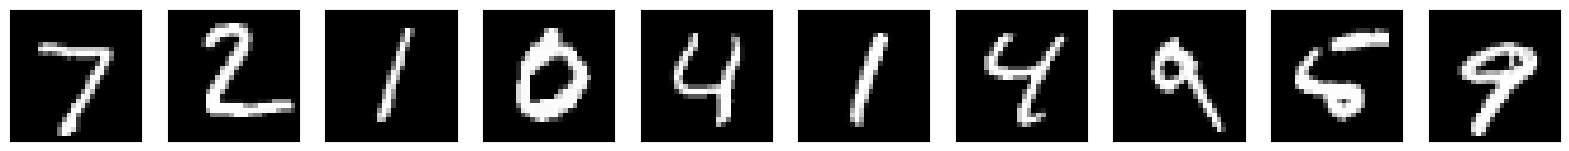

In [5]:
# display dataset 
import matplotlib.pyplot as plt 

# number of digits to diplay 
n = 10
#create a figure to display the images 
plt.figure(figsize=(20 , 4))
# loop through the first "n" numbers of images 
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28 , 28))
    #color display 
    plt.gray()
    #Hide x-axis and y-axis label and ticks 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# show the figure with the images 
plt.show()

#close the figure 
plt.close()

# flattening the images

In [6]:
# print the shapes of the original training data ad labels 
print("Previous X_train shape: {} \nPrevious Y_train shape: {} ".format(X_train.shape , Y_train.shape))

# Reshape training and testing data to a flat format (flattening the image )
X_trian = X_train.reshape(60000 , 784 )
X_test = X_test.reshape(10000 , 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,) 


# min max scaling 

In [7]:
# convert the data type of image to float32 
X_train = X_train.astype("float32")
X_test =  X_test.astype("float32" )

# Normalize the pixel values to a range between 1 (black)and 0 (white)
X_train /= 255 
X_test /= 255 

In [8]:
 # processing of classes in the dataset 
classes = 10 
# Convert the labels to one_hot encoded format 
Y_train = to_categorical(Y_train , classes)
Y_test =  to_categorical(Y_test , classes)

# print the shapes of the preprocesses training data and labels 
print("Now X_train shape: {} \nNew  Y_train shape: {}".format(X_train.shape , Y_train.shape))

Now X_train shape: (60000, 28, 28) 
New  Y_train shape: (60000, 10)


# Setting Hyper Parameters

In [9]:
input_size = 784 
batch_size = 200 
hidden1 = 400 
hidden2 = 20 
classes = 10 
epochs = 10 

# build a FCN model    
                         # this architecture is of 1988 called standard or full connected neural network

In [10]:
model = Sequential()   # it helps ti create a neurak network layer by layer 
model.add(Dense(hidden1 , input_dim = input_size , activation = 'relu'))  # imnput_dim specifies the input size for the layer
model.add(Dense(hidden2 , activation = 'relu'))   # Hidden 2 layers 
model.add(Dense(classes , activation = 'softmax'))  # output layer 
# compilation 
# compile is used for connection 
model.compile(loss = 'categorical_crossentropy' , metrics =['accuracy'] , optimizer = 'sgd') # sgd stands for stucastic gradient descent 
model.summary()      # summary 


    # in FCN if u wants to get a fully  connected neural layer  we use Dense 
            # it is called Dense bcz each neuran is connected to all neurons that are behind it 



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# training the Model 

In [11]:
from time import time

tic = time()

model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=1)
toc = time()
print("Model training took {} secs".format(toc - tic))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(200, 28, 28)


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
# predict probabilities for the test set using the traines model
y_pred_probs = model.predict(X_test , verbose = 0 )
y_pred = np.where(y_pred_probs > 0.5 , 1 , 0)


# calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred , Y_test)
print("\nTest accuracy : {}".format(test_accuracy ))



In [ ]:
# define the mask  for selectig a range of indices (20 to 49 )
mask = range(20 , 50)

# select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# predict probabilities for the selected validation samples
y_pred_probs_valid  = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5 , 1 , 0)



In [ ]:
# set up the figure to display 
n = len(X_valid)
plt.figure(figsize=(20 , 40))
for i in range(n):
  # display the original image
  ax = plt.subplot(2 , n , i+1)
  plt.imshow(X_valid[i].reshape(28 , 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display the prredicted digit 
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2 , n , i+1+n)
  plt.text(0.5 , 0.5 , str(predicted_digit) , fontsize = 12 , ha = 'center' , va = 'center')
  plt.axis('off')
# show plotted images 
plt.show()

# close the plot 
plt.close()